<table align="left">
  <td>
    <a href="https://colab.research.google.com/drive/1VusnTv5gyQmGA6dAkTbtwi-Q6NapZR4Z" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

MAE en el conjunto de entrenamiento (Modelo lineal simple): 0.3404
MAE en el conjunto de prueba (Modelo lineal simple): 0.3267
MAE en el conjunto de entrenamiento (Modelo polinómico): 0.2071
MAE en el conjunto de prueba (Modelo polinómico): 22.6026


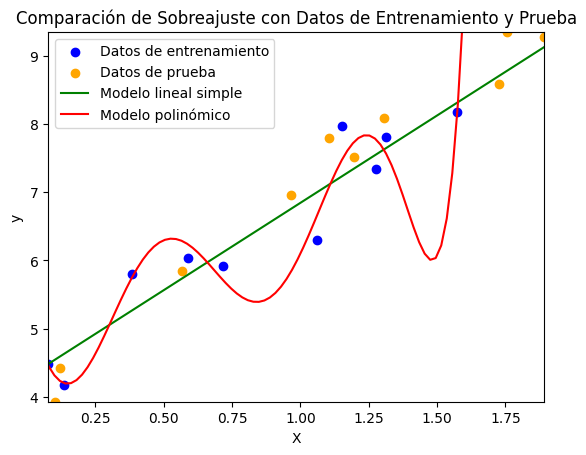

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error

# Generar datos sintéticos: y = 3x + 4 + ruido_gaussiano
np.random.seed(17)

X_train = 2 * np.random.rand(10, 1)
X_test  = 2 * np.random.rand(10, 1)

y_train = 3 * X_train + 4 + np.random.randn(10, 1)/2
y_test  = 3 * X_test + 4 + np.random.randn(10, 1)/2

X = np.concatenate([X_train, X_test])
y = np.concatenate([y_train, y_test])

# Regresión lineal simple
lin_reg_simple = LinearRegression()
lin_reg_simple.fit(X_train, y_train)
y_train_simple = lin_reg_simple.predict(X_train)
y_test_simple = lin_reg_simple.predict(X_test)

# Calcular MAE para el modelo lineal simple
train_mae_simple = mean_absolute_error(y_train, y_train_simple)
test_mae_simple = mean_absolute_error(y_test, y_test_simple)

print(f"MAE en el conjunto de entrenamiento (Modelo lineal simple): {train_mae_simple:.4f}")
print(f"MAE en el conjunto de prueba (Modelo lineal simple): {test_mae_simple:.4f}")

# Regresión polinómica de alto grado (e.g., 7)
poly_features = PolynomialFeatures(degree=7, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)

# Entrenar el modelo polinómico
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly_train, y_train)
y_train_poly = lin_reg_poly.predict(X_poly_train)
y_test_poly = lin_reg_poly.predict(poly_features.transform(X_test))

# Calcular MAE para el modelo polinómico
train_mae_poly = mean_absolute_error(y_train, y_train_poly)
test_mae_poly = mean_absolute_error(y_test, y_test_poly)

print(f"MAE en el conjunto de entrenamiento (Modelo polinómico): {train_mae_poly:.4f}")
print(f"MAE en el conjunto de prueba (Modelo polinómico): {test_mae_poly:.4f}")

# Graficar los resultados
# Puntos de entrenamiento en azul y puntos de prueba en naranja
plt.scatter(X_train, y_train, color='blue', label='Datos de entrenamiento')
plt.scatter(X_test, y_test, color='orange', label='Datos de prueba')

# Graficar la línea del modelo lineal simple
X_range = np.linspace(0, 2, 100).reshape(-1, 1)
y_range_simple = lin_reg_simple.predict(X_range)
plt.plot(X_range, y_range_simple, color='green', label='Modelo lineal simple')

# Graficar la curva del modelo polinómico
X_range_poly = poly_features.transform(X_range)
y_range_poly = lin_reg_poly.predict(X_range_poly)
plt.plot(X_range, y_range_poly, color='red', label='Modelo polinómico')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Comparación de Sobreajuste con Datos de Entrenamiento y Prueba')

# Limitar los ejes para que coincidan con el rango de los datos originales
plt.xlim(min(X), max(X))
plt.ylim(min(y), max(y))

plt.legend()
plt.show()